# Goal: Build and plot `bhp_e`

P. Schuster, University of Michigan  
June 21, 2018

* Load `bhm_e`
* Build a function to sum across custom pairs for `bhp_e`
* Plot it
* Plot slices

In [41]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<div id="toc"></div>

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
sys.path.append('../scripts/')
import numpy as np
import bicorr_e
import bicorr
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set(style='ticks')

# Step 1) Load `bhm_e`

In [6]:
bhm_e, e_bin_edges, note = bicorr_e.load_bhm_e('../analysis/Cf072115_to_Cf072215b/datap')

In [7]:
print(bhm_e.shape)
print(e_bin_edges.shape)
print(note)

(990, 1, 600, 600)
(601,)
Combined measurements from Cf072115 Cf072115b Cf072215a Cf072215b


Load detector pair dictionaries. 

In [8]:
det_df = bicorr.load_det_df()

In [9]:
dict_pair_to_index, dict_index_to_pair, dict_pair_to_angle = bicorr.build_dict_det_pair(det_df)

# Step 2) Produce `bhp_e`

In [10]:
help(bicorr_e.build_bhp_e)

Help on function build_bhp_e in module bicorr_e:

build_bhp_e(bhm_e, e_bin_edges, num_fissions=None, pair_is='all', print_flag=False)
    Build the bicorr_hist_plot by selecting events from bhm and applying normalization factor. The normalization factor is only applied if norm_factor is provided. If not, norm_factor remains at default value 1 and the units are in number of counts. 
    
    Parameters
    ----------
    bhm_e : ndarray
        Master histogram of bicorrelation events in energy space. 
        Dimension 0: detector pair, use dictionary 'dict_pair_to_index', where pair is (100*det1ch+det2ch)
        Dimension 1: interaction type, length 1. Only storing 0=nn.
        Dimension 2: e bin for detector 1
        Dimension 3: e bin for detector 2
    e_bin_edges : ndarray
        One-dimensional array of energy bin edges
    num_fissions : float, optional
        Number of fissions for normalization. If provided, then proceed with normalization. If not provided, then no normal

In [11]:
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges)

Look at subsets of pairs later. For now I'll assume it's going to work...

In [12]:
bhp_e.shape

(600, 600)

# Step 3) Plot it 

I'm going to make a function called `bhp_e_plot` based off of `bhp_plot`.

In [25]:
help(bicorr_plot.bhp_e_plot)

Help on function bhp_e_plot in module bicorr_plot:

bhp_e_plot(bhp_e, e_bin_edges, title=None, vmin=None, vmax=None, zoom_range=None, save_flag=False, save_filename='bicorr_e', save_folder='fig', extensions=['png', 'pdf'], show_flag=False, clear_flag=True)
    Creates 2d bicorr_e hist plot
    
    Parameters
    ----------
    bhm_e : ndarray
        Master histogram of bicorrelation events in energy space. 
        Dimension 0: detector pair, use dictionary 'dict_pair_to_index', where pair is (100*det1ch+det2ch)
        Dimension 1: interaction type, length 1. Only storing 0=nn.
        Dimension 2: e bin for detector 1
        Dimension 3: e bin for detector 2
    e_bin_edges : ndarray
        One-dimensional array of energy bin edges
    title : str, optional
    vmin : float, optional
        Minimum of colorbar range
    vmax : float, optional
        Maximum of colorbar range
    zoom_range : list, optional
        Range of x and y axes. Ex: [0,6] for 0 to 6 MeV
    save_flag : 

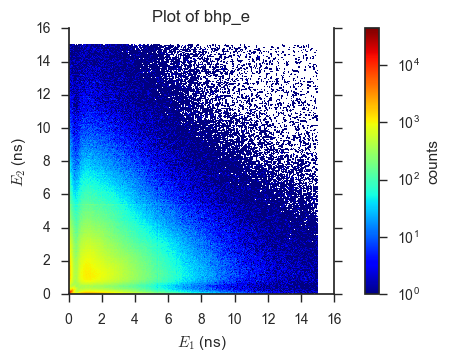

In [14]:
bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, title='Plot of bhp_e', show_flag=True)

Try out the `vmin` and `vmax` input parameters.

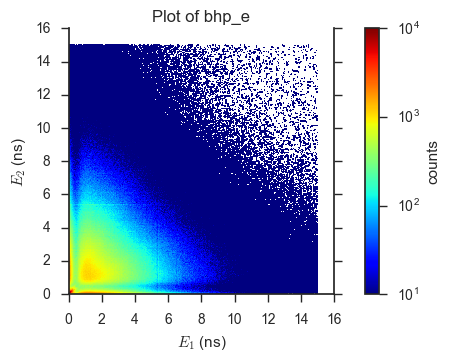

In [15]:
bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, vmin=10,vmax=1e4,title='Plot of bhp_e', show_flag=True)

Try adding `num_fissions`.

In [22]:
num_fissions = 2194651200.00
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,num_fissions=num_fissions)

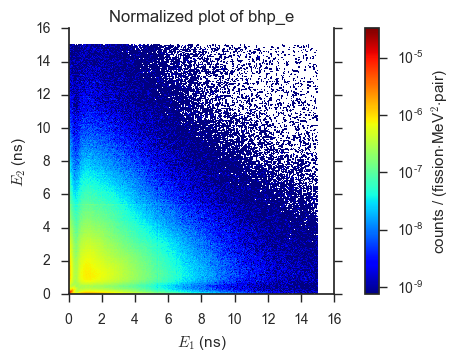

In [23]:
bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, title='Normalized plot of bhp_e', show_flag=True)

Looks pretty good. Zoom in on the central area to see what's going on there.

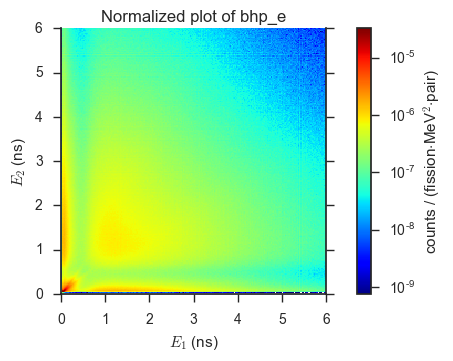

In [26]:
zoom_range = [0,6]

bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, zoom_range=zoom_range, title='Normalized plot of bhp_e', show_flag=True)

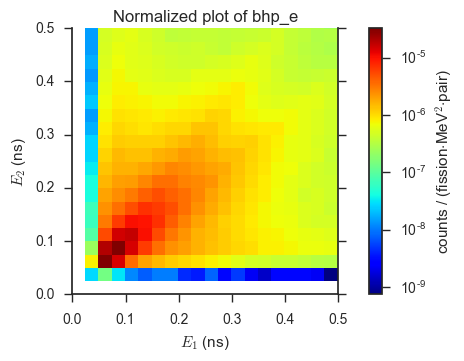

In [27]:
zoom_range = [0,0.5]

bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, zoom_range=zoom_range, title='Normalized plot of bhp_e', show_flag=True)

Methods for plotting and analyzing slices are in `methods > slices_bhp_e.ipynb`.